In [35]:
from portfolio import IBKRClient, run_loop
import time
import threading

app = IBKRClient()

# Connect to TWS or IB Gateway
app.connect("127.0.0.1", 4001, clientId=1)  # Use port 7496 for live accounts

# Start the API thread
api_thread = threading.Thread(target=run_loop, args=(app,), daemon=True)
api_thread.start()

# Allow time to connect and request data
time.sleep(2)

# Request portfolio data
app.reqAccountUpdates(True, "")  # "" requests updates for all accounts

# Allow time for data retrieval
time.sleep(10)

# Print portfolio data
print("\nPortfolio Summary:")
for item in app.portfolio_data:
    print(item)

# Disconnect
app.disconnect()


Next valid order ID: 1
Error -1: 2104 - Market data farm connection is OK:usfarm
Error -1: 2107 - HMDS data farm connection is inactive but should be available upon demand.ushmds
Error -1: 2158 - Sec-def data farm connection is OK:secdefil
Account Summary - NetLiquidation: 1951.42 GBP
Account Summary - NetLiquidation: 1951.42 GBP
Account Summary Received.
Account Summary Received.
Portfolio Update - NVT: 6.0 shares at 76.07159425 USD.
Portfolio Update - PSTG: 5.0 shares at 49.35281755 USD.
Portfolio Download Complete for Account: U13662170

Portfolio Summary:
{'Symbol': 'NVT', 'Position': 6.0, 'Market Price': 76.07159425, 'Market Value': 456.43, 'Average Cost': 72.84671465, 'Unrealized PNL': 19.35, 'Realized PNL': 0.0}
{'Symbol': 'PSTG', 'Position': 5.0, 'Market Price': 49.35281755, 'Market Value': 246.76, 'Average Cost': 48.960048, 'Unrealized PNL': 1.96, 'Realized PNL': 0.0}


In [36]:
app.account_summary

{'NetLiquidation': '1951.42'}

In [37]:
app.portfolio_data

[{'Symbol': 'NVT',
  'Position': 6.0,
  'Market Price': 76.07159425,
  'Market Value': 456.43,
  'Average Cost': 72.84671465,
  'Unrealized PNL': 19.35,
  'Realized PNL': 0.0},
 {'Symbol': 'PSTG',
  'Position': 5.0,
  'Market Price': 49.35281755,
  'Market Value': 246.76,
  'Average Cost': 48.960048,
  'Unrealized PNL': 1.96,
  'Realized PNL': 0.0}]

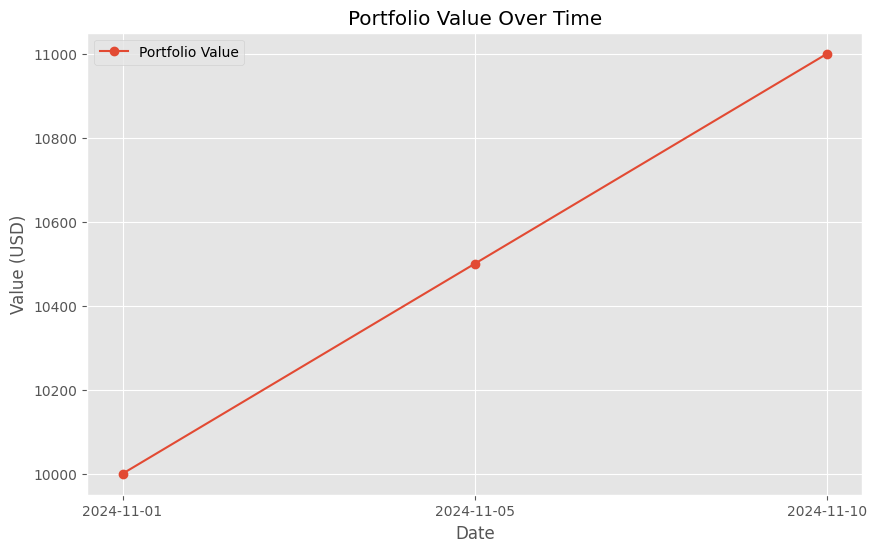

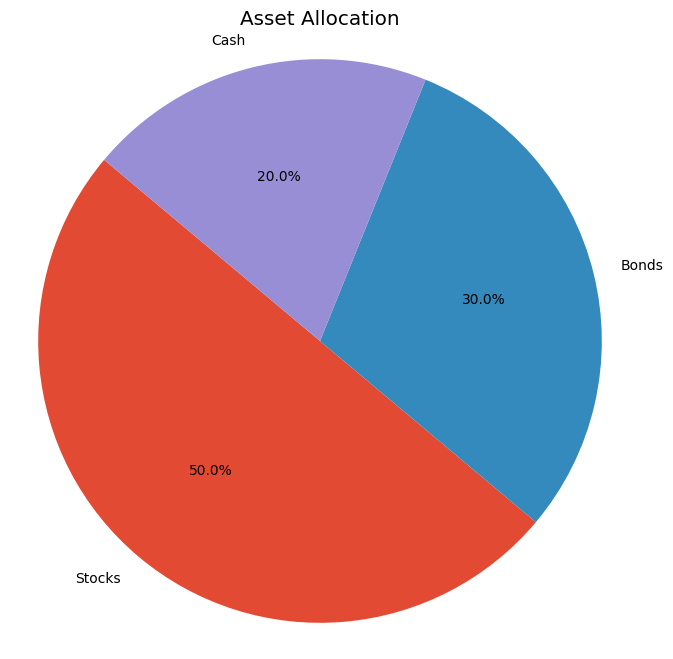

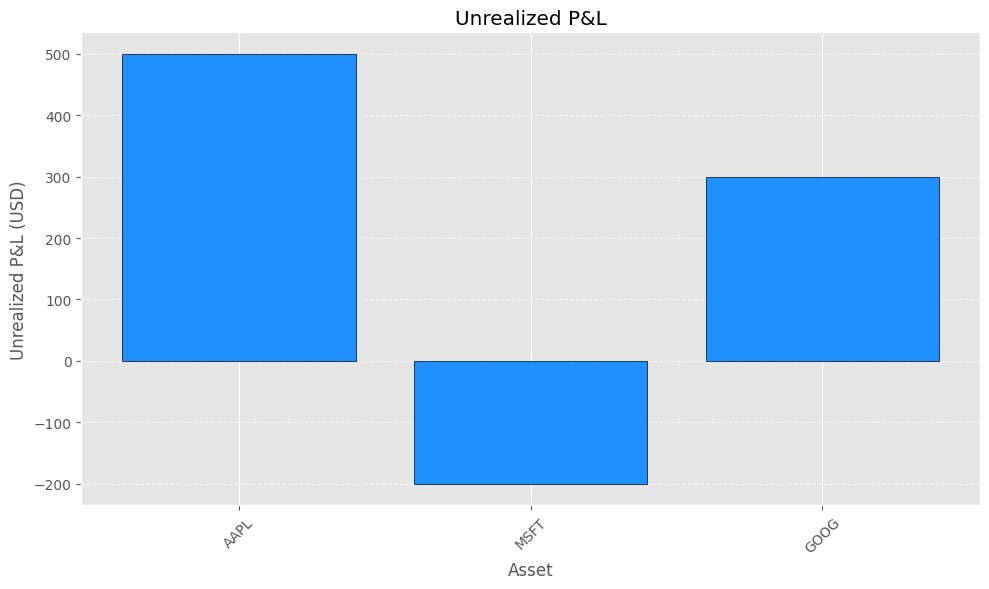

In [22]:
# Create the visualizer
visualizer = PortfolioVisualizer()

# Plot portfolio value
visualizer.plot_portfolio_value(portfolio_data)

# Plot asset allocation
visualizer.plot_asset_allocation(allocations)

# Plot unrealized P&L
visualizer.plot_unrealized_pnl(pnl_data)

# Interactive plot
visualizer.interactive_portfolio_value(portfolio_data)


In [2]:
import yfinance as yf

# Fetch financials for SoundHound
ticker = "SOUN"
company = yf.Ticker(ticker)

# Fetch financial statements
balance_sheet = company.balance_sheet
income_statement = company.financials
cash_flow = company.cashflow



In [3]:
# Display results
print("Balance Sheet:")
print(balance_sheet)




Balance Sheet:
                                                   2023-12-31   2022-12-31  \
Treasury Shares Number                                    0.0          NaN   
Ordinary Shares Number                            254428757.0  200033072.0   
Share Issued                                      254428757.0  200033072.0   
Net Debt                                                  NaN   25722000.0   
Total Debt                                         90159000.0   44124000.0   
...                                                       ...          ...   
Accounts Receivable                                 4050000.0    3414000.0   
Allowance For Doubtful Accounts Receivable          -203000.0    -109000.0   
Gross Accounts Receivable                           4253000.0    3523000.0   
Cash Cash Equivalents And Short Term Investments   95260000.0    9245000.0   
Cash And Cash Equivalents                          95260000.0    9245000.0   

                                                

In [4]:
print("\nIncome Statement:")
print(income_statement)




Income Statement:
                                                     2023-12-31   2022-12-31  \
Tax Effect Of Unusual Items                          -1356180.0    -353010.0   
Tax Rate For Calcs                                         0.21         0.21   
Normalized EBITDA                                   -55336000.0  -98024000.0   
Total Unusual Items                                  -6458000.0   -1681000.0   
Total Unusual Items Excluding Goodwill               -6458000.0   -1681000.0   
Net Income From Continuing Operation Net Minori...  -88937000.0 -116713000.0   
Reconciled Depreciation                               5659000.0    7226000.0   
Reconciled Cost Of Revenue                           11307000.0    9599000.0   
EBITDA                                              -61794000.0  -99705000.0   
EBIT                                                -67453000.0 -106931000.0   
Net Interest Income                                 -14704000.0   -6503000.0   
Interest Expense     

In [11]:
from company_analysis import Company

SOUN = Company(ticker, income_statement.T)
SOUN.ProfitabilityMetrics(SOUN.financials).eps()


2023-12-31   -0.400022
2022-12-31         NaN
2021-12-31         NaN
2020-12-31   -1.114717
dtype: object

In [12]:
income_statement

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Tax Effect Of Unusual Items,-1356180.0,-353010.0,-1328400.0,-1506870.0
Tax Rate For Calcs,0.21,0.21,0.27,0.27
Normalized EBITDA,-55336000.0,-98024000.0,-56734000.0,-59782000.0
Total Unusual Items,-6458000.0,-1681000.0,-4920000.0,-5581000.0
Total Unusual Items Excluding Goodwill,-6458000.0,-1681000.0,-4920000.0,-5581000.0
Net Income From Continuing Operation Net Minority Interest,-88937000.0,-116713000.0,-79540000.0,-74407000.0
Reconciled Depreciation,5659000.0,7226000.0,9088000.0,6037000.0
Reconciled Cost Of Revenue,11307000.0,9599000.0,6585000.0,5863000.0
EBITDA,-61794000.0,-99705000.0,-61654000.0,-65363000.0
EBIT,-67453000.0,-106931000.0,-70742000.0,-71400000.0


In [43]:
print("\nCash Flow Statement:")
print(cash_flow)


Cash Flow Statement:
                                                 2023-12-31   2022-12-31  \
Free Cash Flow                                  -68657000.0  -95348000.0   
Repayment Of Debt                               -35188000.0  -12848000.0   
Issuance Of Debt                                 85087000.0          0.0   
Issuance Of Capital Stock                       118338000.0    4160000.0   
Capital Expenditure                               -392000.0   -1329000.0   
Interest Paid Supplemental Data                  11984000.0    4364000.0   
Income Tax Paid Supplemental Data                 2356000.0    1044000.0   
End Cash Position                               109035000.0    9475000.0   
Beginning Cash Position                           9475000.0   22822000.0   
Effect Of Exchange Rate Changes                    -20000.0          0.0   
Changes In Cash                                  99580000.0  -13347000.0   
Financing Cash Flow                             168237000.0   8200